#          **Linear Regression Model Using EPL Soccer Dataset



## **Project Overview**



The English Premier League is one of the world's most-watched soccer leagues, with an estimated audience of 12 million people per game.
With the substantial financial benefits, all significant teams of EPL are interested in Analytics and AI. Regarding sports analytics, machine learning and artificial intelligence (AI) have become extremely popular. The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players.




Regression is one of the foundational techniques in Machine Learning. As one of the most well-understood algorithms, linear regression plays a vital role in solving real-life problems.
In this project,  Linear Regression is used to predict the scores of EPL soccer players.





## **Approach**

* Install Packages
* Import Libraries
* Exploratory Data Analysis
* Correlation
* Relationship between Cost and Score
* Train - Test Split
* Linear Regression
* Model Summary
* Prediction on Test Data
* Diagnostics and Remedies

## **Important Libraries**
 
* **pandas**: pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language.
 
* **NumPy**: The fundamental package for scientific computing with Python. Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today. NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. 

* **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 
 
* **seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
 
* **scikit-learn**: Simple and efficient tools for predictive data analysis
accessible to everybody and reusable in various contexts.
It is built on NumPy, SciPy, and matplotlib to support machine learning in Python.
 
* **statsmodels**: statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration. 

* **SciPy**: SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics, and many other classes of problems. 

## **Install Packages**

In [5]:
import warnings
warnings.filterwarnings('ignore')

## **Data Reading **

In [7]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure


In [9]:
# Load the data as a data frame by using URL


df = pd.read_csv("EPL_Soccer_MLR_LR.csv")

In [10]:
#view top 3 entries from the soccer data

df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


In [11]:
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

## **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes 

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees in h

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match


## **Exploratory Data Analysis**
Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data. 
 
It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.


### **Dataframe Information**
 
 
The [dataframe.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method prints information about the DataFrame, including the index dtype and columns, non-null values, and memory usage.
 
It can be used to get basic info, look for missing values, and get a sense of each variable's format.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


There are total 202 rows and 13 columns in EPL Soccer Dataset.

Observe that there are no null values in the dataset.

Out of 13 columns 10 are float type and 1 is integer type
The remaining 2 have object dtype.





## **Basic Statistical Concepts**

* **Mean**: The mean is one of the measures of central tendency. Simply put, the mean is the average of the values in the given set. The observed values are totaled and divided by the total number of observations to determine the mean.
If $x_i$ is $i^{th}$ observation then mean of all $x_i$ ranging from $ 1\leq i\leq n $ denoted by $\bar x$ is given as

$$ \bar{x} = \sum_{i=1}^{n}\frac{x_i}{n} $$


* **Variance**: Variance is a measure of variation. It is calculated by averaging the squared deviations from the mean.
The degree of spread in your data set is indicated by variation. The greater the spread of the data, the greater the variance in proportion to the mean.
Here's the formula for variance of a sample.

$$S^2 = \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$$


* **Standard Deviation**: The standard deviation is a measure that shows how much variation (such as spread, dispersion, and spread) exists from the mean. The standard deviation represents a "typical" departure from the mean. It is a popular measure of variability since it returns to the data set's original units of measurement.
Here's the formula for standard deviation of a sample.

$$S = \sqrt \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$$

## **Dataframe Description**
To generate descriptive statistics [pandas.dataframe.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function is used.
 
Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
 
 
It is used to get a basic description of the data, looking at the spread of the different variables,
along with abrupt changes between the minimum, 25th, 50th, 75th, and max for the different variables.
 
The quartiles provide an excellent insight into the range of a set of data. You may easily establish where your data sits in the range and which quartile you fall into by knowing the percentile points 25th, 50th, and 75th, as well as your own data point.
 
* The 25th percentile is also referred to as the first, or lower, quartile. The 25th percentile is the figure at which 25% of the data falls below it and 75% of the answers fall above it.
 
* The Median is also known as the 50th percentile. The median divides the set of data in half. Half of the data points are below the median, while the other half are above it.
 
* The 75th percentile is often referred to as the third, or upper, quartile. The 75th percentile is the value at which 25% of the responses are higher and 75% of the answers are lower.
 
 
<br>
 
 
### **Descriptive statistic for quantitative variables**

DataFrame.count: Count number of non-NA/null observations
 
DataFrame.max: Maximum of the values in the object
 
DataFrame.min: Minimum of the values in the object
 
DataFrame.mean: Mean of the values
 
DataFrame.std: Standard deviation of the observations
 
DataFrame.select_dtypes: Subset of a DataFrame including/excluding columns based on their dtype


In [13]:
# descriptive statistics

df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000



To get summary of all the columns you can provide include = 'all' in the describe function

code: df.describe(include='all')

For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

## **Correlation**

Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient.
It measures the linear relationship between two continuous variables.
 
Let's say $x$ and $y$ are two continuous variables, the Pearson correlation coefficient between them can be found by the following formula.
 
 
$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$
 
where $x_i$ and $y_i$ represents the $i^{th}$ value of the variables.
The value of $r$ ranges between $-1$ and $+1$.
 
Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.
 




## **Graphs of Different Correlation Coefficients**
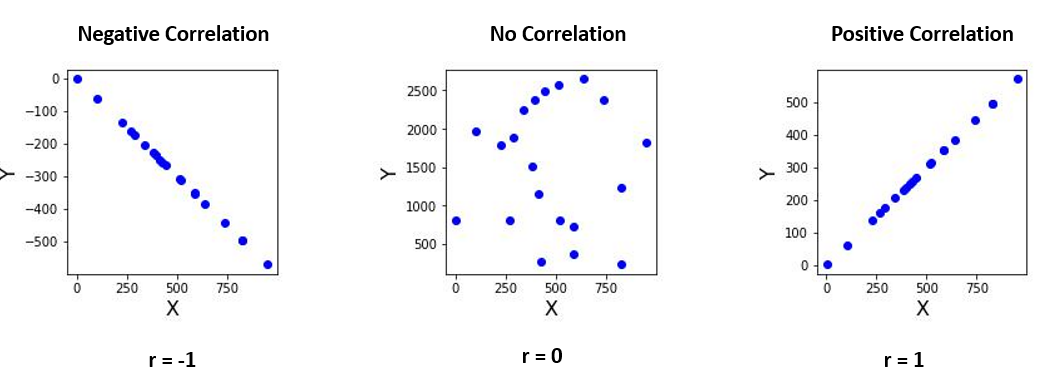

1. $r = -1$ indicates a perfect negative relationship between the variables 

2. $r = 0$ indicates no relationship between the variables

3. $r = 1$ indicates a perfect positive relationship between the variables



To find correlation between variables from the soccer data we will use [pandas.dataframe.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method.

It computes pairwise correlation between two columns by excluding NA or NaN values if any. The default method used to calculate correlation coefficient is pearson correlation.

In [14]:
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


The correlation between DistanceCovered(InKms) and the target variable score $-0.49$ indicates negative correlation.
The variable cost is related to the target variable with correlation coefficient $0.96$ which indicates strong positive relationship. 
 

 




## **Relationship between Cost and Score**

Score and Cost have a 96% correlation, making it a significant variable. Cost can be selected as the predictor variable for simple linear regression since the scatter plot between them will demonstrate a linear relationship.


To see this relationship visually, let's plot the scatter plot for Cost and Score.


Text(0.5, 1.0, 'Scatter plot between Cost and Score')

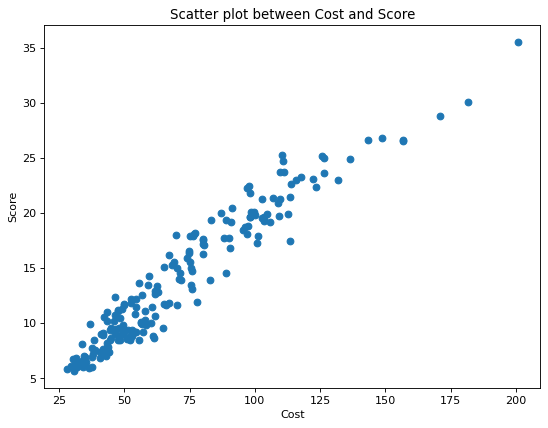

In [16]:
# cost vs. score

figure(figsize=(8, 6), dpi=80)
plt.scatter(df['Cost'], df['Score'])

# label

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

# Strong linear association between cost and score, maybe some concern with model after a cost of 125 or so!



The correlation between Cost and Score is easily visible here.
 
The Pearson correlation and scatter plot demonstrate that as the cost increases, so does the score. But what can we do with this knowledge?
 
How can we know how much money should be spent to achieve a specific score?
This is where Linear Regression comes in. It assists us in modeling the linear relationship between two or more variables so that we may foresee the results using the model.
 

 



## **Train - Test Split**

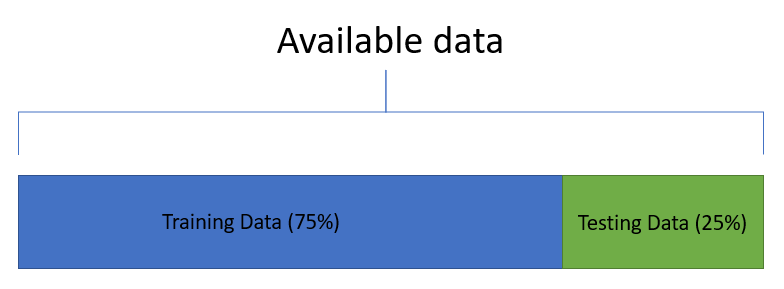


The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.

<br>



### **Underfitting and Overfitting**
 
* **Underfitting**: Underfitting occurs when a statistical model or machine learning algorithm fails to capture the underlying trend of the data, i.e., it performs well on training data but poorly on testing data. Its occurrence merely indicates that our model or method does not adequately suit the data. It frequently occurs when we select a simpler model yet the data contains complicated non-linear patterns or when there is insufficient data to develop a linear model. The obvious approach is to build a complex model or increase the number of linear features in the data.
 
* **Overfitting**: When a statistical model fails to produce correct predictions on testing data, it is said to be overfitted. When a model is trained with a large amount of data, it begins to learn from the noise and incorrect data entries in our data set. It usually occurs when we build a complex model on a simpler dataset.
An overfitted model performs well on training data because it has memorized the patterns in the data, but it performs poorly on testing data. An under-fitted model, on the other hand, will perform worse on both datasets because it is unable to capture the trends and patterns underlying the dataset when training.

<br>





In [17]:
# Assign x, y then do training testing split

x=df['Cost']
y=df['Score']

# Splitting with 75% training, 25% testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

The data is first assigned to input variable (x) and output variable (y) accordingly, then the train test split function from sklearn is used to perform splitting into a ratio of 75:25 with a random state of 100. The random state is a seed given to randomly generate indices for train and test sets.

## **Linear Regression**

Linear Regression is a statistical approach to modeling the linear relationship between predictor variables and the target variable.

These variables are known as the independent and dependent variables, respectively. 


When there is one independent variable, it is known as **simple linear regression**. When there are more independent variables, it is called **multiple linear regression**.

**Simple Linear Regression**:   $\hat y = \beta_0+\beta_1x+\epsilon$


**Multiple Linear Regression**: $\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$ where $p$ is... number of features in the model



Linear regression serves two primary functions: understanding variable relationships and forecasting:
 
* The coefficients represent the estimated magnitude and direction (positive/negative) of each independent variable's relationship with the dependent variable.
*  A linear regression equation predicts the mean value of the dependent variable given the values of the independent variables. So, it enables us to forecast.
 
 


## **Mathematics behind Linear Regression**
 
Here's the formula for simple linear regression.
 
$$y=\beta_0+\beta_1x+\epsilon$$
 
 
Let's understand each of the terms involved:
* For any given value of the independent variable (x), y is the predicted value for the dependent variable (y).
* $\beta_0$ represents the intercept, or the predicted value of y when x is 0.
* $\beta_1$is the regression coefficient, which tells us how much y will change as x increases.
* x is the independent or predictor variable that helps us predict y
* $\epsilon$ is the error left due to not so accurate calculation of the regression coefficients.
 
 
Linear regression determines the best fit line across your data by looking for the regression coefficient (B1) that minimizes the model's total error (e).
 
<br>


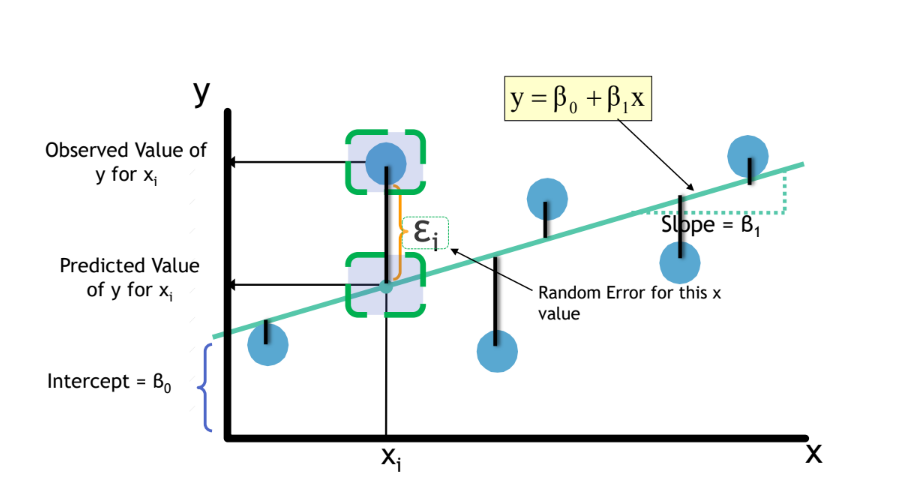

Let's understand the regression line with the example graph above. 

* The $\beta_0$ parameter indicates the intercept or the constant value of y when x is 0.

* The $\beta_1$ parameter is the slope or steepness of the regression line.

* The distance between the predicted value of y on the regression line and the corresponding true value of y is basically the error.




## **Errors in Regression**
 
The regression line regress towards the mean to create the best fit which essentially means that the errors are at the lowest. In the above plot, it is visible that the regression line is not able to exactly predict the true values. There is always going to be some space for errors.
 
Let's understand the various errors in Regression:
 
 
* The mean absolute error (MAE) is the most basic regression error statistic to grasp. We'll compute the residual for each data point individually, using only the absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$
 
* The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.
 
$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$
 
 
* The root mean squared error (RMSE) is another error statistic you may come upon. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.
 
$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$
 
 
* The percentage counterpart of MAE is the mean absolute percentage error (MAPE). Just as MAE is the average amount of error created by your model, MAPE is the average distance between the model's predictions and their associated outputs. MAPE, like MAE, has a clear meaning because percentages are easier for people to understand. Because of the use of absolute value, MAPE and MAE are both resistant to the effects of outliers.
 
$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

## **Finding the Best Fit Line**


We can proceed with the Linear Regression model after determining the correlation between the variables, independent variable, and target variable, and if the variables are linearly correlated.
Finding coefficients of linear regression is the process of determining the values of the coefficients ($\beta_0$ and $\beta_1$) in the equation of a linear regression model. The objective of finding the coefficients is to minimize the difference between the actual values of the target variable and the predicted values. 
 
The Linear Regression model will determine the best fit line for the scatter of data points.
 
The equation of the regression line is :
 
$$y=\beta_0+\beta_1x$$
 
where $\beta_0$ and $\beta_1$ are regression coefficients.
 
* $\beta_1$: This is basically the slope of the line which shows how steep the regression line would be. The slope is calculated by a change in y divided by a change in x.
$$\beta_1 = \frac{dy}{dx}$$
 
* $\beta_0$: This is the intercept. It is the value of y when x is 0. When the straight line passes through the origin intercept is 0.
 
We can have infinite possibilities for the values of the regression coefficients. How do you find the best fit line out of all the possible lines?
 
The best fit line should have the minimum errors.
 
 
### **Cost Function**
 
The cost function assesses how well a machine learning model performs.
The cost function calculates the difference between predicted and actual values as a single real number.
 
The following is the distinction between the cost function and the loss function:
 
The loss function is the error for individual data points, while the cost function is the average error of n-samples in the data.
 
### **Residual Sum of Squares (RSS) or Sum of Squared Errors(SSE)**
 
Ordinary least square or Residual Sum of squares (RSS) or Sum of Squared Errors (SSE) is minimized to find the value of β0 and β1, to find the best fit of the predicted line.
 
$$ MSE = \frac{1}{N} RSS = \frac{1}{N}\sum_{i=1}^{n}(y-\hat y)^2 $$
 
Hence,
 
$$SSE = \sum_{i=1}^{n}(y-\hat y)^2 $$
 
There are two main methods to find the coefficients of linear regression: least squares and gradient descent.
 
### **Least Squares Estimators**
 
One of the methods to optimize the Linear Regression equation for the minimum SSE is using Least Squares Estimators. These are the following steps involved in finding out the best fit line parameters:
 
1. Differentiate the SSE with respect to $\beta_0$ and $\beta_1$
 
2. Setting the partial derivatives equal to zero yields **normal equations** which can then be manipulated to find $\beta_0$ and $\beta_1$ for the minimum SSE.
 
 
 


### **Gradient Descent**

Gradient descent is an optimization algorithm that iteratively adjusts the coefficients to minimize the cost function. The cost function measures the difference between the actual and predicted values. The gradient descent algorithm updates the coefficients using the gradient of the cost function. The gradient of the cost function gives us the direction of the steepest descent, which we use to adjust the coefficients. The process is repeated until the cost function reaches a minimum.




Scikit-learn's LinearRegression and Statsmodels' OLS (Ordinary Least Squares) are two popular libraries for linear regression in Python. While both can be used to perform linear regression, there are some differences between them:

* Model Fitting: Scikit-learn provides a simple API for model fitting. The fit method of the LinearRegression class takes in the input features and target variable, and returns the fitted model. On the other hand, Statsmodels provides a more detailed and statistically rigorous approach to model fitting with its OLS class, which allows users to specify various model assumptions, summary statistics and hypothesis testing.

* Model Summary: Scikit-learn provides only the coefficients and their standard errors, while Statsmodels provides a more detailed summary of the regression results, including R-squared, F-statistic, p-values, and confidence intervals for the coefficients. This can be useful for hypothesis testing and model selection.

* Model Evaluation: Scikit-learn provides several evaluation metrics for regression models, such as mean squared error, mean absolute error, and R-squared. Statsmodels provides similar metrics, but also offers the ability to run hypothesis tests on the coefficients, such as t-tests and F-tests, which are useful for model selection and inference.

* Speed: Scikit-learn's LinearRegression is optimized for speed, making it a good choice for large datasets. Statsmodels' OLS is less optimized for speed, and can be slower for large datasets.

In conclusion, when it comes to choosing between the two, it depends on the specific requirements of the project. If a simple, fast, and flexible linear regression model is needed, scikit-learn's LinearRegression is a good choice. If a more detailed statistical analysis of the regression results is needed, with the ability to perform hypothesis tests and perform detailed evaluation, then Statsmodels' OLS may be a better choice.

## **Point Estimator of the Mean Response**

Point estimators of the mean response in linear regression refer to estimates of the expected value of the response variable for a given predictor variable. These estimates are calculated using the estimated coefficients of the regression line, which are obtained through regression analysis.

In linear regression, the mean response is modeled as a linear combination of the predictor variables, where the coefficients represent the effect of each predictor on the response. Given a set of predictor variables, the point estimator for the mean response can be calculated by plugging in the values of the predictors into the regression equation and solving for the expected value of the response.

For example, if we have a simple linear regression model with one predictor, $x$, and a response, $y$, the point estimator for the mean response would be given by $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$, where $\hat{\beta_0}$ and $\hat{\beta_1}$ are the estimated intercept and slope coefficients, respectively.

Point estimators are useful because they provide a quick and straightforward way to make predictions about the mean response for a given set of predictor values. However, it is important to keep in mind that point estimators are just estimates and are subject to sampling variability and other sources of error. Therefore, it is common to also provide confidence intervals or prediction intervals along with point estimators to account for uncertainty in the predictions.

## **Point Estimator of the Variance**

In linear regression, the variance of the error (also called residual variance) is a measure of the spread of the residuals around the fitted line. The residuals are the differences between the observed values and the values predicted by the regression model.

The point estimator of the variance of the error is the mean squared error (MSE) divided by the degrees of freedom (n-p-1), where n is the number of observations and p is the number of predictors in the model. The formula for the point estimator of the variance of the error is:

$\hat{\sigma}^2 = \frac{1}{n-p-1} \sum_{i=1}^n (y_i - \hat{y_i})^2$

where $\hat{y_i}$ is the predicted value for the i-th observation, and $y_i$ is the observed value. The MSE is a measure of the overall fit of the regression model. The smaller the MSE, the better the fit of the model. The variance of the error provides information on the spread of the residuals, which can be used to determine the reliability of the regression model.

In summary, the point estimator of the variance of the error is an important quantity in linear regression as it provides information on the spread of the residuals, which can be used to evaluate the fit of the regression model.

## **Sampling Distribution for Regression Coefficients**

In linear regression, the coefficients (also known as parameters) represent the relationship between the independent variable(s) and the dependent variable. The coefficients can be estimated using different methods, such as the method of least squares, maximum likelihood estimation, or Bayesian inference.

The sampling distribution of the coefficients is an important aspect of linear regression analysis. It provides information about the variability and uncertainty of the estimates, and allows us to make inferences about the population parameters based on the sample estimates.

For example, consider a simple linear regression model with one independent variable (x) and one dependent variable (y):

$$ y = \beta_0 + \beta_1 x + \epsilon $$

where $\beta_0$ and $\beta_1$ are the intercept and slope coefficients, respectively, and $\epsilon$ is the error term.


###**T-Distribution and Hypothesis Testing**

A common way to make inferences about the coefficients is through hypothesis testing. This involves setting up a null hypothesis, $H_0$, and an alternate hypothesis, $H_1$. For example, the null hypothesis may be that $\beta_1=0$, meaning that there is no relationship between the predictor variable and the response variable. The alternate hypothesis may be that $\beta_1≠0$, meaning that there is a relationship.

The point estimator of $\beta_1$ is the sample regression coefficient, denoted by $\hat{\beta_1}$. It is the value that minimizes the sum of squared differences between the observed y values and the predicted y values. The sampling distribution of $\hat{\beta_1}$ is approximately normal, with mean $\beta_1$ and variance $\sigma^2_{\hat{\beta_1}}$, where $\sigma^2_{\hat{\beta_1}} = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$.



The t-distribution is used to model the sampling distribution of the coefficients in linear regression. The t-distribution takes into account the sample size and the degrees of freedom (df), which is the number of independent observations in the sample minus the number of parameters estimated. For example, in simple linear regression with one predictor, there are 2 parameters (the intercept and the slope) and n - 2 degrees of freedom.

The **t-distribution** is used to test the hypothesis that the population mean of a coefficient is equal to some value. For example, we may want to test the hypothesis that the population slope, $\beta_1$, is equal to zero, which means that there is no relationship between the predictor and the response. The hypothesis test is performed by calculating the t-statistic and the corresponding p-value. The t-statistic is calculated as:

$$ t = \frac{\hat{\beta_1} - \beta_{1}}{SE(\hat{\beta_1})} $$

where $\hat{\beta_1}$ is the sample estimate of the slope, $\beta_{1}$ is the hypothesized value of the population slope, and $SE(\hat{\beta_1})$ is the standard error of the estimate of the slope. The standard error can be calculated as:

$$ SE(\hat{\beta_1}) = \sqrt{\frac{s^2}{n-2}} $$

where $s^2$ is the residual sum of squares divided by the degrees of freedom and $n$ is the sample size.

The t-statistic is compared to the critical value of the t-distribution to determine if the null hypothesis should be rejected. A small p-value indicates that the data provides strong evidence against the null hypothesis, while a large p-value suggests that the data does not provide strong evidence against the null hypothesis.

The p-value is the probability of observing a t-statistic as extreme or more extreme than the calculated value, assuming the null hypothesis is true. If the p-value is less than a significance level (e.g. 0.05), we reject the null hypothesis and conclude that there is evidence that the population slope is not equal to zero.

In conclusion, the t-distribution is used to model the sampling distribution of the coefficients in linear regression and to perform hypothesis testing. It allows us to make inferences about the population parameters and assess the strength of the relationship between the predictor and the response.


###**Confidence Intervals**

Confidence intervals can also be calculated for the coefficients. A confidence interval is a range of values that is likely to contain the population parameter with a certain level of confidence. For example, a 95% confidence interval means that if we repeated the sampling process many times, 95% of the intervals calculated would contain the true population parameter.

The confidence interval for a coefficient is calculated as:

$\hat{\beta_1} ± t_{critical} * SE(\hat{\beta_1})$

where $t_{critical}$ is the critical value of the t-distribution at a certain level of confidence.

In summary, samplining distributions of coefficients in linear regression help us make inferences about the population parameters. Through hypothesis testing and confidence intervals, we can determine if the coefficients are statistically significant and estimate their values with a certain level of confidence.





## **Comparing Regression Models**
 
 
We now have the best possible Linear Regression equation parameters. The question is, how do we assess our model?
Is it possible to use SSE to say that our model has this much SSE and thus is good?
What criteria would you use to compare one regression model to another?
 
One of the major drawbacks of SSE is that the SSE will change if the units of the actual y and predicted y change.
As a result, we introduce a relative term called $R^2$, which creates consistency among the models. But, before we get any further into $R^2$, let's take a step back and look at TSS.
 
 
### **Total Sum of Squares (TSS)**
 
The total Sum of Squares is similar to SSE but instead of adding the actual value’s difference from the predicted value, in the TSS, we find the difference from the mean y.
 
$$TSS = \sum_{i=1}^{n}(y-\bar y)^2 $$
 
TSS functions as a cost function for a model with no independent variables and only the intercept ($\bar y$). This indicates how good the model is in the absence of any independent variables.
 
 
SSE provides the model performance when an independent variable is added. The ratio $\frac{SSE}{TSS}$ indicates how good the model is in comparison to the mean value without variance. The residual error with actual values (SSE) is smaller, while the residual error with the mean (TSS) is larger. Hence, the overall ratio is lower for a robust model.


Let’s move to our case, we are going to model the relationship between Cost and Scores using Ordinary Least Squares of the statsmodels library.

In [20]:
#statsmodels approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           6.91e-88
Time:                        13:03:19   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

## **Model Summary**
 
Now that we have successfully modeled let's evaluate the results and summary of the model:
 
* $R^2$: The $R^2$ or the coefficient of determination is the proportion of the variance in the dependent variable that is explained from the independent variable(s). $R^2$ is expressed between 0 and 1 for the level of variance explained.
As we learned in the previous section, the ratio $\frac{SSE}{TSS}$ should be low for a robust model, this ratio signifies the error or unexplained variance by the independent variable(s).
Mathematically, $R^2$ or explained variance can be expressed as:
 
$$ R^2 = 1 - \frac{SSE}{TSS} $$
* We got an $R^2$ of **0.93** which is pretty good.
 
* Adjusted $R^2$: For linear models, adjusted $R^2$ is a corrected goodness-of-fit statistic. It determines the proportion of variance in the target field explained by the input or inputs.
$R^2$ tends to overestimate the goodness-of-fit of the linear regression. It always grows as the number of independent variables in the model grows.
It happens because we tend to deduct a large amount (due to multiple variables) to calculate error as the number of independent variables increases. Hence, the ratio $\frac{SSE}{TSS}$ is even lower than it should be and  $R^2$ seems to be high but it might not be an appropriate model for production data. It is adjusted to account for this overestimation. Considering N as the total sample size and p as the number of independent variables, adjusted $R^2$ can be expressed as:

$$ \text{Adjusted }  R^2 = 1 - \frac{(1 - R^2)(N - 1)}{N - p - 1} $$
 
 
* F-Statistic: F-Statistic can be used for hypothesis testing about whether the slope is meaningful or not. F-statistics is a statistic used to test the significance of regression coefficients in linear regression models. F-statistics can be calculated as MSR/MSE where MSR represents the mean sum of squares regression and MSE represents the mean sum of squares error.
The null hypothesis is that the slope is 0 or there is no relationship between the predictor and target variables. If the value of F-statistics is greater than the critical value, we can reject the null hypothesis and conclude that there’s a significant relationship between the predictor variables and the response variable.
 
 
* Prob (F-Statistic): The p-value of the f statistic is very small, which basically means what are the odds that the null hypothesis is true and we observe the same result due to random chance, and the odds are very small that h0: beta1 is 0, highly unlikely that the model is not good, and highly likely that the slope is not zero.
 
 
 
These were the basic evaluation metrics. 




### **$R^2$ can take negative values!**

It compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then $R^2$  is negative which will essentially mean that model is making no sense and is predicting randomly.

const    0.947185
Cost     0.182083
dtype: float64


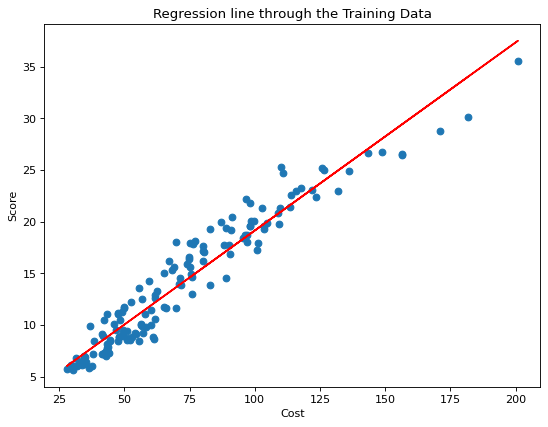

In [ ]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)

plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")

plt.show()

In this plot, we are extracting the values of the intercept $\beta_0$ and coefficient/slope $\beta_1$ and plotting the regression line over the scatter plot of the Cost and Score of training data.
 
The regression line has a good fitting, it probably deviates a little after a cost of 125 or so, let's see if we can improve it in the later sections when we diagnose and remedy but first let's see how our model performs on the test data.


## **Prediction on Test Data**

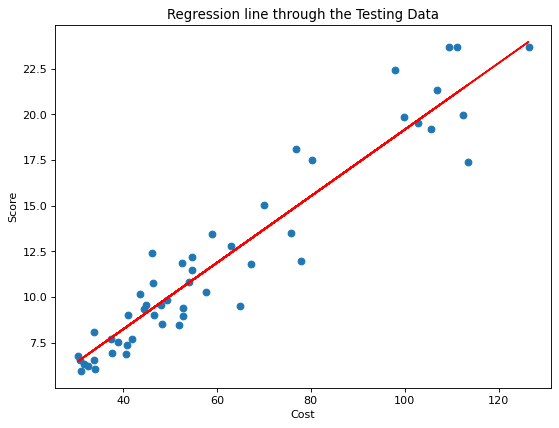

In [22]:
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


# scatter plot on test data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")

plt.show()


Here we can see that the model has built a good regression fit as it is passing through the middle of all the points to get the minimum error.
 
Observe that all the data points in the test data lie in the range of the training data. This is called interpolation. What if we analyze a data point with a cost say 560? This is extrapolation and the model probably won't be robust to it.


## **Assumptions of Linear Regression**
 
 
Linear regression is a parametric model which means it requires the specification of some parameters before they can be used to make predictions. These parameters or assumptions are:
 
* **The relationship between the independent and dependent variable is linear**: the line of best fit through the data points is a straight line.
 
* **Homoscedasticity**: means homogeneity of variance of residuals across the values of the independent variable.
 
* **Independence of observations:** the observations in the dataset were collected using statistically valid sampling methods, and there are no hidden relationships among observations.
 
* **Normality**: The data follows a normal distribution.


## **Diagnostics and Remedies**
  Diagnostics and Remedies is evaluating if the data follows the assumptions or not, whether Linear Regression is a good fit for the patterns in the data, and simply includes the things we do in order to assess how well the model performs. The following are the things we look for in the data to diagnose Linear Regression as an unfit model:
 
* **Non-Linearity**: First thing to look for is non-linearity, for example, your data might look linear for some time, and then it shows non-linearity and a parabola would fit better than a straight line.
 
* **Heteroscedasticity**: meaning non-constant variance, variance in one region may not be the same as in the second region.
 
* **Independence**: Errors are not independent and identically distributed.
 
* **Outliers**: Outliers can have a large impact on the model, for example, if there's a slow-growing regression line and there is an outlier up in the center, it will pull the regression line upwards than most of the data.
 
* **Missing Features**: Missing predictor variables, no need in a simple linear regression, which simply means losing on variables that can be useful but are not included.
 
 
How do we begin to assess all these things? 
 
**Residual Analysis**
 
Residual analysis is used to study residuals in data and to understand what needs to be done to improve our model performance. Residual is the error we get by subtracting the prediction value from the true value of the dependent variable. 
 
 
$$R_i = y_i-\hat y_i$$
 
* First, plot the residual versus predictor; if the scatter plot shows a departure from linearity (parabola), reevaluate the model; if not, try a modification to make the data linear.
 
* This plot also shows indications of non-constant variance; if the data points scatter in the shape of a megaphone, we can claim the variance is not constant. We can also use transformations to overcome heteroscedasticity, or we can use weighted least squares.
 
* Another plot that can be used is a sequence plot or residuals versus time order. We may want to search for a cyclical pattern or a straight trend, which indicates when linear regression would be useful and when it would not.
 
* Box plot of residuals: if we have a lovely and centered box plot, we are fine; if we have a little bias to one side of the box plot, we clearly lack some normalcy; we can also check this with normal probability plot if it is skewed to the right and skewed to the left.
 
* Next is to check for outliers, don't eliminate outliers unless you absolutely have to such as in a scenario when a data point is simply incorrect. 
 
 

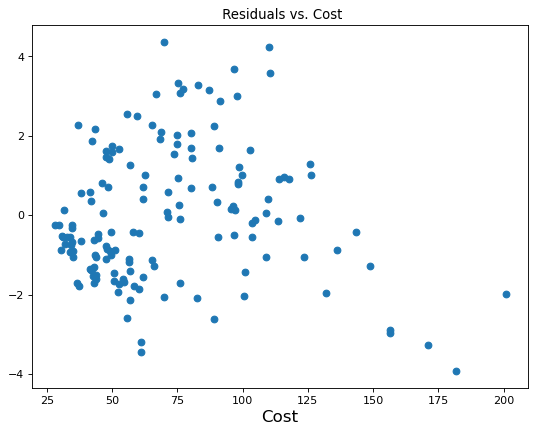

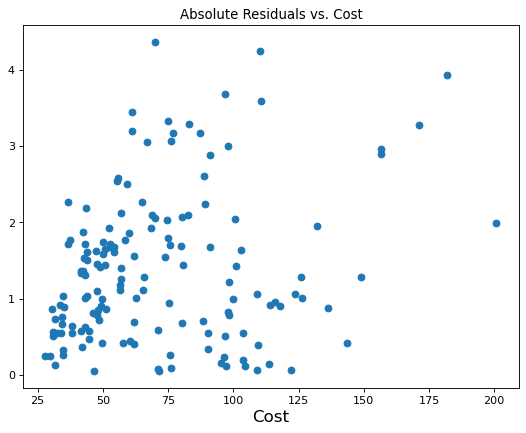

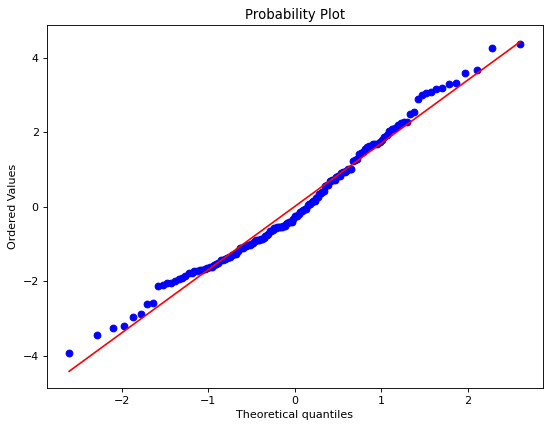

<Figure size 432x288 with 0 Axes>

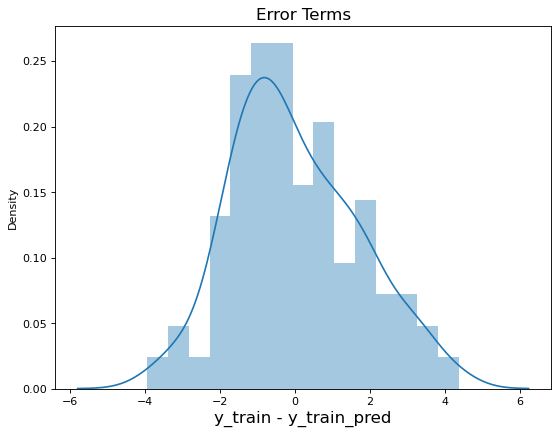

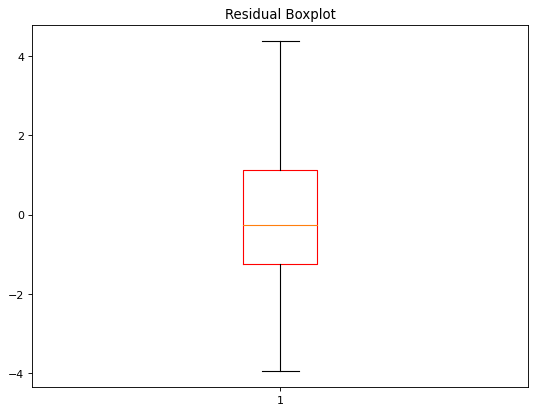

In [24]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
figure(figsize=(8, 6), dpi=80)
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()




#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8, 6), dpi=80)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

#Normality plot
figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values

fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');



At the beginning of the section - Diagnostics and Remedies, we saw the steps we can take to understand the patterns in data and if we need to do some transformations to make the assumptions of linear regression hold true. Here are the observations that we made from the above plots:
 
* The residuals vs cost plot shows a good scatter of residuals and no pattern is observed up until 125 or 150 costs. We can say we have some heteroscedasticity in the higher costs. We'll see how we can tackle it. 
 
* The normality of the errors can be seen in the normal probability plot and the histogram. It is more or less normal or bell shaped.
 
* The residual boxplot shows no obvious outliers.
 
 


### **Transformations to avoid non-constant variance**

Non-constant variance can be a problem in linear regression, as the assumption of constant variance of the errors is a key requirement for the ordinary least squares (OLS) method to be unbiased and efficient. When this assumption is violated, the regression coefficients can be inefficient and/or the predictions can be biased. To avoid non-constant variance, there are different data transformations that can be applied.

* Log transformation: This transformation is often used when the variance of the data increases with the mean. A log transformation can be used to stabilize the variance by converting the data into logarithmic values.

* Square root transformation: This transformation is also used to stabilize the variance by converting the data into square root values.

* Box-Cox transformation: This is a statistical transformation that is used to stabilize the variance by transforming the data into values that are closer to a normal distribution. The Box-Cox transformation is a more flexible and powerful transformation compared to the log and square root transformations.

* Yeo-Johnson transformation: This is a newer and more flexible version of the Box-Cox transformation that can handle both positive and negative data values.

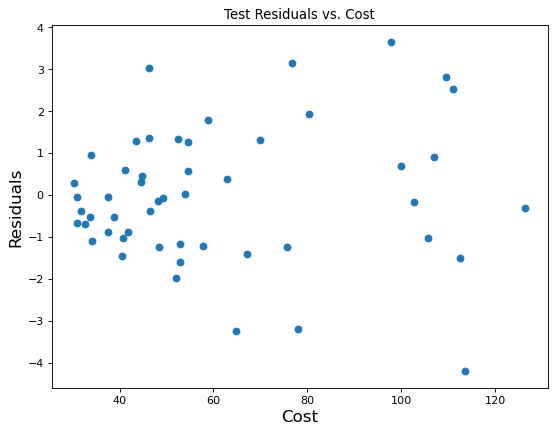

In [25]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
figure(figsize=(8, 6), dpi=80)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.ylabel('Residuals',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance

 the scatter of data points increases as  the cost increases. This is evidence of Heteroscedasticity.
 


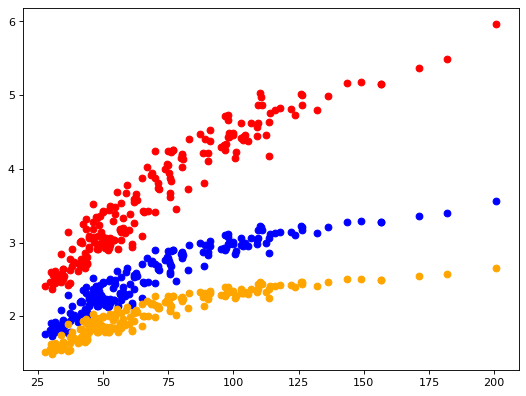

In [26]:
# 

#Try sqrt
sqrt_y=np.sqrt(y)
figure(figsize=(8, 6), dpi=80)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

We can observe that the square root transformation denoted by red dots gives the most linear scatter of data points. Let's try to run the linear regression model on the transformed variable and analyze the change in results.

In [27]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           9.72e-75
Time:                        13:06:43   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.0

We can see the change in $R^2$ and Adjusted $R^2$ after the transformation. They are almost similar which suggests that $R^2$ is no longer overestimating the variance explained by the predictor variable.

const    1.967367
Cost     0.023433
dtype: float64


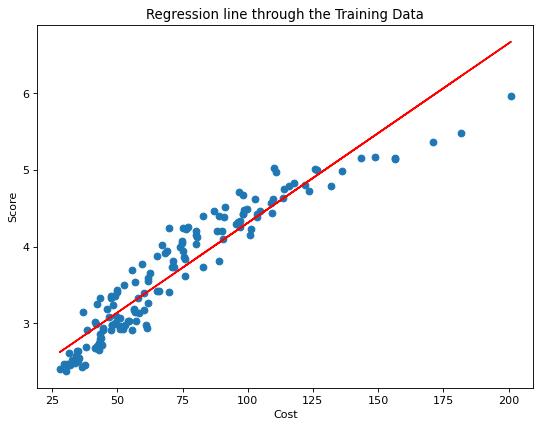

In [29]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")
plt.show()


 extracted the linear regression coefficients and plotted the regression line on the Cost vs Score scatter plot.

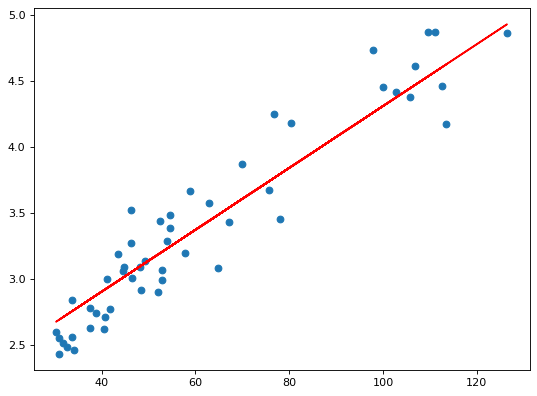

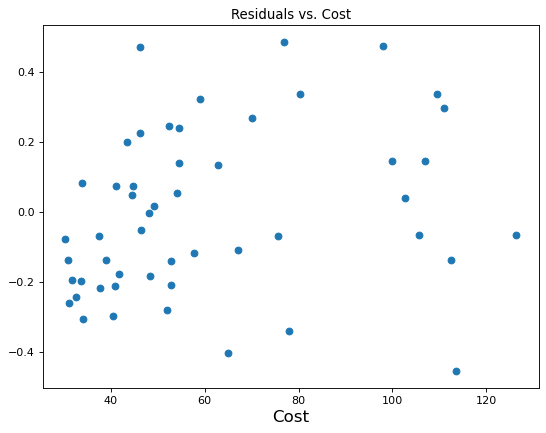

In [30]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
figure(figsize=(8, 6), dpi=80)
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination

Here's the same exercise but for the test dataset. Observe that the range of test data is within the train data and the maximum cost is 120, hence the regression line fits in the best way possible.